# Basic Aggregation Modeling

We start with the assumption that there are two species in our system -> an aggregation-prone species A and another species which can disaggregate A catalytically, C. Regardless of the more specific details about the mode of aggregation, we make the following assumptions: that the total amount of A remains constant, and that C is produced and degraded throughout the simulation.

In the current implementation, aggregation is modeled as an inactivation step which occurs at a rate relative to temperature. Inactivation of this species occurs relative to the square root of the concentration of inactivated species, giving a rough surface area-like dependence. The explicit aggregation process is not considered; this means we currently cannot extract any information about the aggregates themselves other than bulk concentration. Future models will include information about size distribution, mechanism of aggreagtion, and RNA interaction.

The following are the equations which describe the system, where T is concentration and [] denotes concentration:

\begin{equation}
\begin{aligned}
\frac{dA}{dt} &= 2k_1[iAA][C] - k_3[A]([A]-1)T
\\
\frac{dAA}{dt} &= k_3[A]([A]-1)T - k_5[AA][iAA]^{\frac{1}{2}}T
\\
\frac{diAA}{dt} &= k_5[AA][iAA]^{\frac{1}{2}}T - k_1[iAA][C]
\\
\frac{dC}{dt} &= k_4T[iAA] - k_2[C]
\end{aligned}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gsim_A import Reaction, Species, Network, UniDeg, TDReaction
from reactivation_A import MonomerReactivation, HeatInducedProduction, HeatInducedInactivation, Temp_Dimerization

Step: 500
Step: 1000
Step: 1500
Step: 2000
Step: 2500
Step: 3000
Step: 3500
Simulation finished after 3590 steps


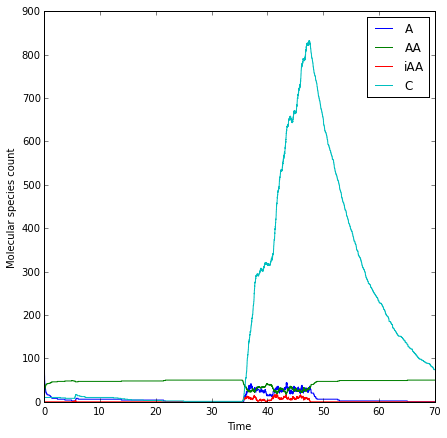

In [10]:
# Here I've copied the main function of the above simulation so the code can be manually inspected
# Rates and Temperatures
k1 = 0.01 #disaggregation rate
k2 = 0.1 #chaperone degradation rate
k3 = 0.0001 #dimerization rate
k4 = 0.05 #heat induced chaperone production rate
k5 = 0.001 #heat inactivation rate of assembler
temp_fxn = [(1,298)]    

# Species
A = Species("A", 100)
AA = Species("AA", 0)
iAA = Species("iAA", 0)
C = Species("C", 10)

# Temperature independent reactions
disagg = MonomerReactivation("Disagg", [iAA, C], [A, C], None, k1)
deg = UniDeg("C Degredation", [C], [None], None, k2)
# Simulation and Temperature-Dependent Reaction
nuc = Temp_Dimerization("Dimerization", [A], [AA], None, k3)
hip = HeatInducedProduction("Heat Induced Production", [iAA], [C], None, k4)
inactivation = HeatInducedInactivation("Inactivation", [AA], [iAA], None, k5)
sp_list = [A, AA, iAA, C]
rxn_list= [inactivation, disagg, hip, deg, nuc]
system = Network(sp_list, rxn_list)
x = system.simulate(0, 70, temp_fxn, "None")

colors = ['b','g','r','c']
fig, axis = plt.subplots(figsize=(7,7)) 
for i in range(2,len(sp_list)+2):
    axis.step(x[:,0], x[:,i], label=sp_list[i-2].name, c=colors[i-2])
plt.legend(loc=0)
plt.xlim(0,x[-1,0])
plt.xlabel("Time")
plt.ylabel("Molecular species count")
None

The most sensitive parameter appears to be the rate of chaperone production: changing this value dramatically changes the appearance of the plots.

The excitability of the system is due to the fact that the inactivation step is very rare/slow compared to all other rates when there are no aggregated species present, and much faster when aggregation has already occured- this is roughly a proxy for a rare nucleation step follow by subsequent aggregation at a fast rate.

Below is the same simluation but with the inital step of aggregation occuring at the same rate as all other parameters (i.e. scaled only by temperature). The chaperone production rate was also decreased - this doesn't change the qualitative behavior of the system, but does change the relative amounts of chaperone produced (i.e. the graph scales better).

Here we see a more steady-state balance between the aggregated species and the chaperones, which is qualitatively independent of the chaperone concentration. 

Simulation finished after 7803 steps


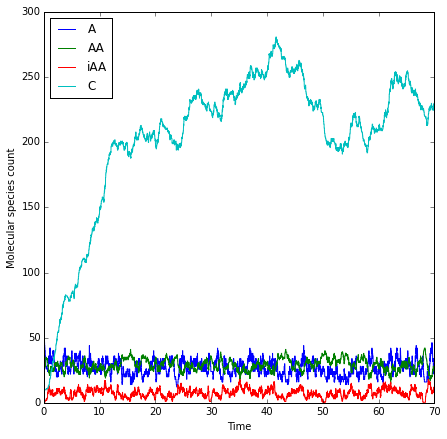

In [6]:
# Rates and Temperatures
k1 = 0.01 #disaggregation rate
k2 = 0.1 #chaperone degradation rate
k3 = 0.0001 #dimerization rate
k4 = 0.01 #heat induced chaperone production rate
k5 = 0.001 #heat inactivation rate of assembler
temp_fxn = [(1,298)]    

# Species
A = Species("A", 100)
AA = Species("AA", 0)
iAA = Species("iAA", 0)
C = Species("C", 10)

# Temperature independent reactions
disagg = MonomerReactivation("Disagg", [iAA, C], [A, C], None, k1)
deg = UniDeg("C Degredation", [C], [None], None, k2)
# Simulation and Temperature-Dependent Reaction
nuc = Temp_Dimerization("Dimerization", [A], [AA], None, k3)
hip = HeatInducedProduction("Heat Induced Production", [iAA], [C], None, k4)
inactivation = HeatInducedInactivation("Inactivation", [AA], [iAA], None, k5)
sp_list = [A, AA, iAA, C]
rxn_list= [inactivation, disagg, hip, deg, nuc]
system = Network(sp_list, rxn_list)
x = system.simulate(0, 70, temp_fxn, "None")

colors = ['b','g','r','c']
fig, axis = plt.subplots(figsize=(7,7)) 
for i in range(2,len(sp_list)+2):
    axis.step(x[:,0], x[:,i], label=sp_list[i-2].name, c=colors[i-2])
plt.legend(loc=0)
plt.xlim(0,x[-1,0])
plt.xlabel("Time")
plt.ylabel("Molecular species count")
None

Starting with equimolar concentrations of aggreagtion-prone species and disaggregators.

Simulation finished after 8043 steps


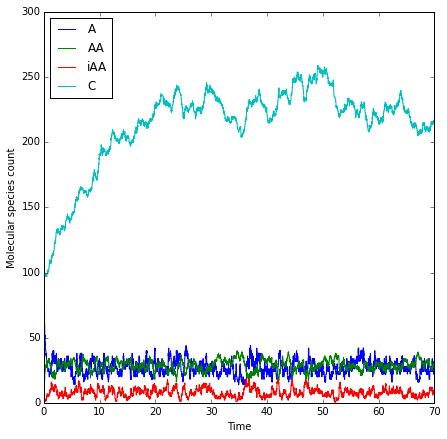

In [8]:
# Rates and Temperatures
k1 = 0.01 #disaggregation rate
k2 = 0.1 #chaperone degradation rate
k3 = 0.0001 #dimerization rate
k4 = 0.01 #heat induced chaperone production rate
k5 = 0.001 #heat inactivation rate of assembler
temp_fxn = [(1,298)]    

# Species
A = Species("A", 100)
AA = Species("AA", 0)
iAA = Species("iAA", 0)
C = Species("C", 100)

# Temperature independent reactions
disagg = MonomerReactivation("Disagg", [iAA, C], [A, C], None, k1)
deg = UniDeg("C Degredation", [C], [None], None, k2)
# Simulation and Temperature-Dependent Reaction
nuc = Temp_Dimerization("Dimerization", [A], [AA], None, k3)
hip = HeatInducedProduction("Heat Induced Production", [iAA], [C], None, k4)
inactivation = HeatInducedInactivation("Inactivation", [AA], [iAA], None, k5)
sp_list = [A, AA, iAA, C]
rxn_list= [inactivation, disagg, hip, deg, nuc]
system = Network(sp_list, rxn_list)
x = system.simulate(0, 70, temp_fxn, "None")

colors = ['b','g','r','c']
fig, axis = plt.subplots(figsize=(7,7)) 
for i in range(2,len(sp_list)+2):
    axis.step(x[:,0], x[:,i], label=sp_list[i-2].name, c=colors[i-2])
plt.legend(loc=0)
#plt.xlim(0,x[-1,0])
plt.xlim()
plt.xlabel("Time")
plt.ylabel("Molecular species count")
None

No temperature dependence of dimerization or first inactivation reaction.

Simulation finished after 568 steps
Average number of aggregated species: 3.182777


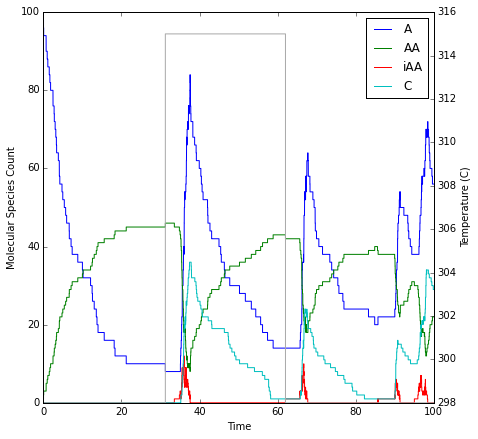

In [8]:
# Rates and Temperatures
k1 = 0.01 #disaggregation rate
k2 = 0.1 #chaperone degradation rate
k3 = 0.001 #dimerization rate
k4 = 0.01 #heat induced chaperone production rate
k5 = 0.001 #heat inactivation rate of assembler
temp_fxn = [(1,298), (30,315), (60,298)]    

# Species
A = Species("A", 100)
AA = Species("AA", 0)
iAA = Species("iAA", 0)
C = Species("C", 0)

# Temperature independent reactions
disagg = MonomerReactivation("Disagg", [iAA, C], [A, C], None, k1)
deg = UniDeg("C Degredation", [C], [None], None, k2)
# Simulation and Temperature-Dependent Reaction
nuc = Temp_Dimerization("Dimerization", [A], [AA], None, k3)
hip = HeatInducedProduction("Heat Induced Production", [iAA], [C], None, k4)
inactivation = HeatInducedInactivation("Inactivation", [AA], [iAA], None, k5)
sp_list = [A, AA, iAA, C]
rxn_list= [inactivation, disagg, hip, deg, nuc]
system = Network(sp_list, rxn_list)
x = system.simulate(0, 100, temp_fxn, "None")

colors = ['b','g','r','c']
fig, axis = plt.subplots(figsize=(7,7)) 
for i in range(2,len(sp_list)+2):
    axis.step(x[:,0], x[:,i], label=sp_list[i-2].name, c=colors[i-2])
plt.legend(loc=0)
axis2 = axis.twinx()
axis2.step(x[:,0],x[:,1], c='darkgray')
plt.xlim(0,x[-1,0])
plt.xlim()
axis.set_xlabel("Time")
axis.set_ylabel("Molecular Species Count")
axis2.set_ylabel("Temperature (C)")
print 'Average number of aggregated species: %f' % np.mean(x[:, 4])